In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt19 = "Download the PDB for 2YXF. Tell me about its stability, as found in literature. Then, simulate it for 1ns and plot its RMSD over time."
llm_var = "gpt-4o-2024-05-13"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-29
time: 09:35:23
LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [3]:
agent.run(prompt19)

Thought: To address the question, I need to perform the following steps:
1. Download the PDB file for 2YXF.
2. Search the literature for information about the stability of 2YXF.
3. Set up and run a 1ns simulation for 2YXF.
4. Plot the RMSD over time for the simulation.

First, I will download the PDB file for 2YXF.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "2YXF"
}
```PDB file found with this ID: 2YXF


2024-07-29 09:35:28.993 
  command:

    streamlit run /opt/anaconda3/envs/mdagent/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


To proceed, I will now search the literature for information about the stability of the protein 2YXF.

Action:
```
{
  "action": "LiteratureSearch",
  "action_input": "stability of protein 2YXF"
}
```"Protein 2YXF stability studies"
Search: "Protein 2YXF stability studies"


	Scraper pubmed failed on paper titled 'Nanoparticle colloidal stability in cell culture media and impact on cellular interactions.'.
Traceback (most recent call last):
  File "/opt/anaconda3/envs/mdagent/lib/python3.11/site-packages/paperscraper/scraper.py", line 100, in scrape
    result = await asyncio.wait_for(
             ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/mdagent/lib/python3.11/asyncio/tasks.py", line 489, in wait_for
    return fut.result()
           ^^^^^^^^^^^^
  File "/opt/anaconda3/envs/mdagent/lib/python3.11/asyncio/futures.py", line 203, in result
    raise self._exception.with_traceback(self._exception_tb)
  File "/opt/anaconda3/envs/mdagent/lib/python3.11/asyncio/tasks.py", line 277, in __step
    result = coro.send(None)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/mdagent/lib/python3.11/site-packages/paperscraper/lib.py", line 293, in pubmed_scraper
    await pubmed_to_pdf(pubmed_id, path, session)
  File "/opt/anaconda3/envs/mdagent/lib/


Found 12 papers
To proceed, I will now set up and run a 1ns simulation for 2YXF. After the simulation, I will plot the RMSD over time.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "2YXF_093529",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "ewaldErrorTolerance": 0.0005,
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NPT",
      "Number of Steps": 500000,
      "record_interval_steps": 5000,
      "record_params": ["step", "potentialEnergy", "temperature"]
    }
  }
}
```
Setting default forcefields v2
B

('To summarize the results and provide the final answer:\n\n1. **Downloaded the PDB file for 2YXF**: The PDB file was successfully downloaded with the ID `2YXF_093529`.\n\n2. **Literature Search on Stability**: The literature search did not yield specific information on the stability of protein 2YXF. The references provided discussed general methods and interactions but did not directly address the stability of 2YXF.\n\n3. **Simulation Setup and Execution**: \n   - The initial attempt to set up the simulation failed due to missing hydrogen atoms in the MET residue.\n   - The PDB file was cleaned to add missing atoms and hydrogens, resulting in the cleaned file `2YXF_093716`.\n   - A 1ns simulation was successfully run using the cleaned PDB file. The simulation trajectory and state log were saved.\n\n4. **RMSD Calculation and Plotting**: \n   - The RMSD over time was calculated using the simulation trajectory.\n   - The RMSD data was saved to a CSV file with ID `rmsd_093727`.\n   - The 

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-29
time: 12:20:45
Files found in registry: 2YXF_093529: PDB file downloaded from RSCB
 PDBFile ID: 2YXF_093529
 2YXF_093716: Cleaned File:  Removed Heterogens
 and Water Kept.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_093727: Initial positions for simulation sim0_093727
 sim0_093727: Basic Simulation of Protein 2YXF_093716
 rec0_093729: Simulation trajectory for protein 2YXF_093716 and simulation sim0_093727
 rec1_093729: Simulation state log for protein 2YXF_093716 and simulation sim0_093727
 rec2_093729: Simulation pdb frames for protein 2YXF_093716 and simulation sim0_093727
 rmsd_093727: RMSD for 093727
 fig0_122034: RMSD plot for 093727


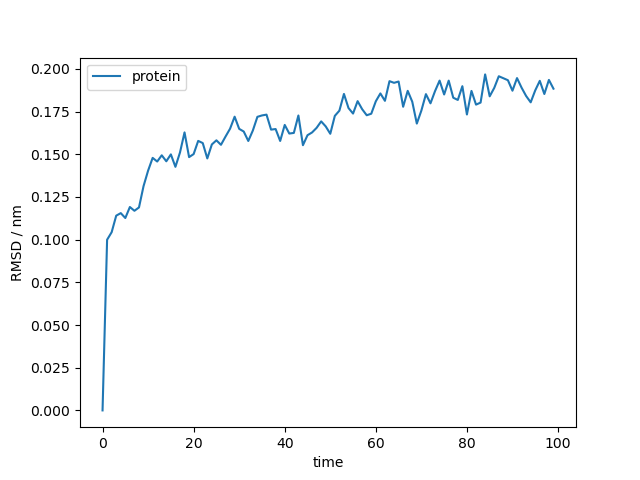

In [7]:
path_rmsd = registry.get_mapped_path("fig0_122034")
from IPython.display import Image
Image(filename=path_rmsd)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅  
### Attempted all necessary steps ✅  
### Completed without Hallucination ✅
### Logic make sense  ✅  
### Correct Answer  ✅  